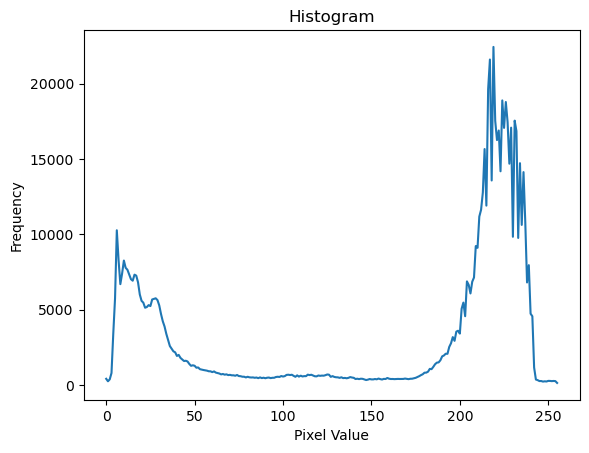

In [3]:
##histogram
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'flower1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [2]:
import cv2
import numpy as np

# Load the image
image_path = 'flower1.jpg'
image = cv2.imread(image_path)

# Apply Gaussian blur (low pass filter)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Display the original and blurred images
cv2.imshow('Original Image', image)
cv2.imshow('Blurred Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np

# Load the image
image_path = 'flower1.jpg'
image = cv2.imread(image_path)

# Create a kernel for high pass filtering
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])

# Apply the kernel to perform high pass filtering (sharpening)
high_pass_image = cv2.filter2D(image, -1, kernel)

# Display the original and high pass images
cv2.imshow('Original Image', image)
cv2.imshow('High Pass Image', high_pass_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
###2 Write a Python program to read ‘rice.tif’ image, count number of rice and display area (also specific range), major axis length, and perimeter.


Total Rice Grains: 85
Average Area: 3364.5823529411764
Average Major Axis Length: 127.80771403593175
Average Perimeter: 364.0253711139455


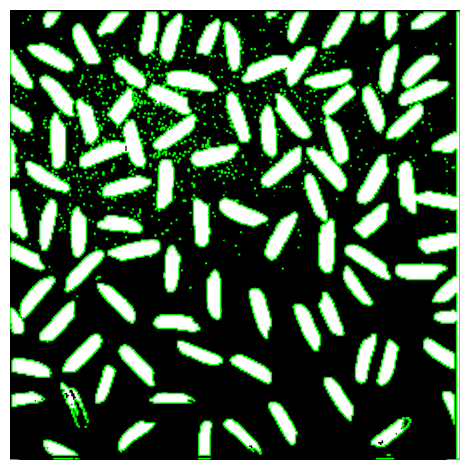

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the rice.tif image in grayscale
image_path = 'rice1.tiff'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding to segment the rice grains
_, binary_image = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)

# Find contours of rice grains
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to store rice statistics
total_rice = 0
total_area = 0
total_major_axis_length = 0
total_perimeter = 0

# Iterate through the detected rice grains
for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    if area > 50:  # Filter out small noise contours
        total_rice += 1
        total_area += area
        ellipse = cv2.fitEllipse(contour)
        major_axis_length = max(ellipse[1])
        total_major_axis_length += major_axis_length
        total_perimeter += perimeter

# Calculate average statistics
average_area = total_area / total_rice
average_major_axis_length = total_major_axis_length / total_rice
average_perimeter = total_perimeter / total_rice

# Display results
print("Total Rice Grains:", total_rice)
print("Average Area:", average_area)
print("Average Major Axis Length:", average_major_axis_length)
print("Average Perimeter:", average_perimeter)

# Draw contours on the image
contour_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
plt.imshow(contour_image)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# 3 Write a MATLAB/Python program to read an image and perform convolution with 3X3 mask

In [7]:
import cv2
import numpy as np

# Load the image
image_path = 'flower1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a 3x3 convolution mask
mask = np.array([[1, 0, -1],
                 [2, 0, -2],
                 [1, 0, -1]])

# Perform convolution using OpenCV's filter2D function
convolved_image = cv2.filter2D(image, cv2.CV_64F, mask)

# Display the original and convolved images
cv2.imshow('Original Image', image)
cv2.imshow('Convolved Image', convolved_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#4. Write a MATLAB/Python program to read an image and perform Lapliciant filter mask

In [8]:
import cv2
import numpy as np

# Load the image
image_path = 'flower1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply the Laplacian filter using OpenCV's Laplacian function
laplacian_filtered = cv2.Laplacian(image, cv2.CV_64F)

# Display the original and Laplacian-filtered images
cv2.imshow('Original Image', image)
cv2.imshow('Laplacian Filtered Image', laplacian_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
### 5 Write a MATLAB/Python program to identify horizontal, vertical lines from an image

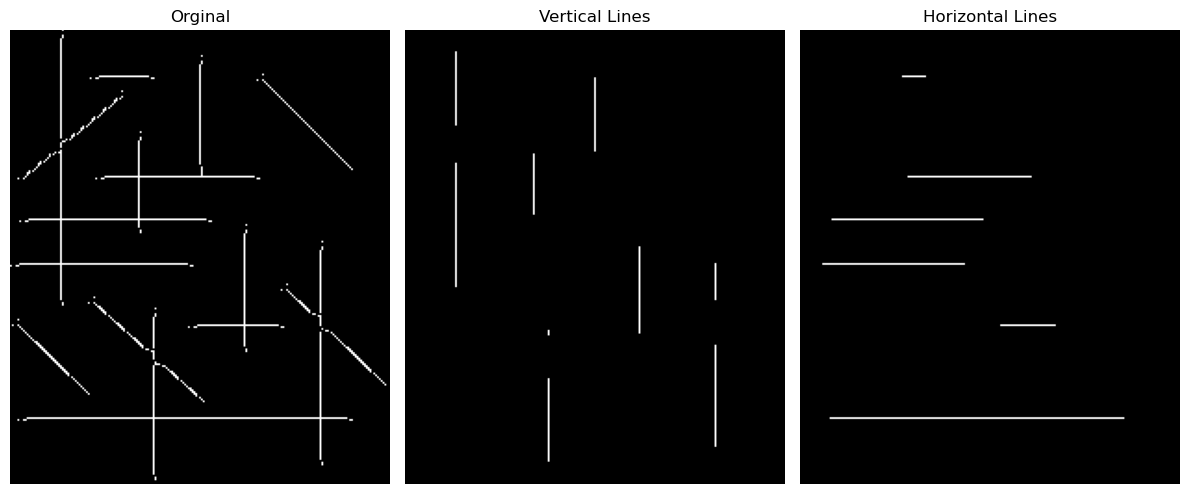

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image=cv2.imread('lineCode.png',cv2.IMREAD_GRAYSCALE)
verticalKernal=np.ones((15,1),np.uint8)
horizontalKernal=np.ones((1,15),np.uint8)

verticalLines=cv2.erode(image,verticalKernal,iterations=1)
horizontalLines=cv2.erode(image,horizontalKernal,iterations=1)

plt.figure(figsize=(12,8))

plt.subplot(131)
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.title('Orginal')

plt.subplot(132)
plt.imshow(verticalLines,cmap='gray')
plt.axis('off')
plt.title('Vertical Lines')

plt.subplot(133)
plt.imshow(horizontalLines,cmap='gray')
plt.title('Horizontal Lines')
plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
# 6   Write a MATLAB/Python program to Character Segment of an image.

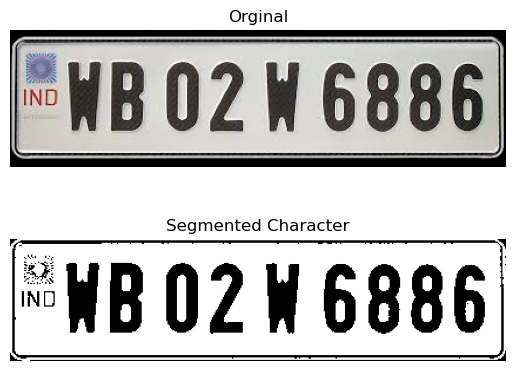

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def character_segmentation(image):
    # Convert the image to grayscale.
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to binarize the image.
    thresh_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)[1]
    
    # Find the contours of the characters in the image.
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize a list to store the segmented characters.
    segmented_characters = []
    
    # Loop over the contours.
    for contour in contours:
        # Extract the bounding box of the contour.
        (x, y, w, h) = cv2.boundingRect(contour)
    
        # If the bounding box is large enough, then it is a character.
        if w * h > 100:
            # Crop the character from the image.
            character = thresh_image[y:y + h, x:x + w]
            # Append the character to the list of segmented characters.
            segmented_characters.append(character)
    
    return segmented_characters

# Read the image.
image = cv2.imread("character.jpg")

# Segment the characters in the image.
segmented_characters = character_segmentation(image)
# Display the segmented characters.
plt.subplot(211)
plt.imshow(image,cmap='gray')
plt.title('Orginal')
plt.axis('off')

for character in segmented_characters:
    plt.subplot(212)
    plt.imshow(character,cmap='gray')
    plt.title('Segmented Character')
plt.axis('off')
plt.show()


In [ ]:
##7.	For the given image perform edge detection using different operators and compare the results.

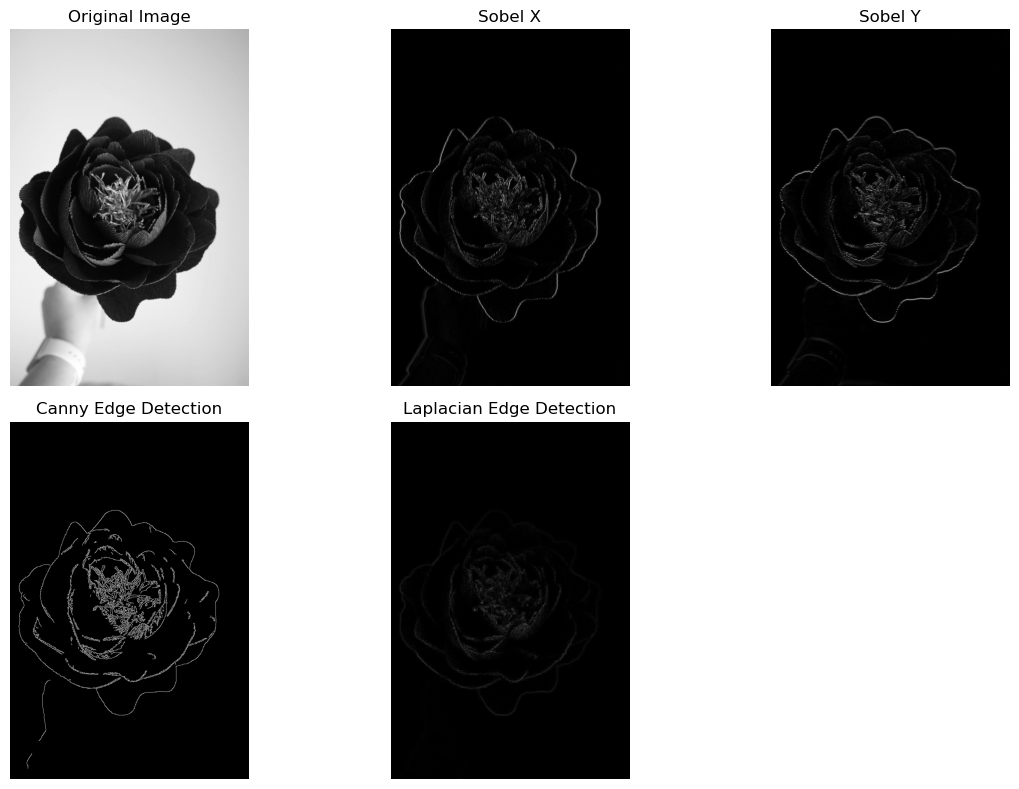

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'flower1.jpg'  # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply different edge detection operators
edges_sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
edges_sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
edges_canny = cv2.Canny(img, 100, 200)
edges_laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(np.abs(edges_sobel_x), cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(np.abs(edges_sobel_y), cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(np.abs(edges_laplacian), cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


8 . Write a MATLAB/Python program to read coins.png, leveling all coins and display area of all coins

In [18]:
import cv2
import numpy as np

# Load the image
image_path = 'coins-contour.tiff'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and enhance edge detection
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Perform Canny edge detection
edges = cv2.Canny(blurred, 30, 150)

# Find contours in the edged image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a counter for coins and display their areas
coin_count = 0

for contour in contours:
    # Calculate the area of each contour
    area = cv2.contourArea(contour)
    
    # Filter out small noise regions
    if area < 100:
        continue
    
    # Draw the contour on the original image
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
    
    coin_count += 1
    print(f"Coin {coin_count}: Area = {area:.2f} pixels")

# Display the number of coins and the image with contours
print(f"Number of coins: {coin_count}")

# Display the image with contours
cv2.imshow('Coins with Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()



Coin 1: Area = 12781.50 pixels
Coin 2: Area = 13895.00 pixels
Coin 3: Area = 20419.50 pixels
Coin 4: Area = 13412.50 pixels
Coin 5: Area = 267.00 pixels
Coin 6: Area = 113.50 pixels
Coin 7: Area = 14931.50 pixels
Coin 8: Area = 161.50 pixels
Coin 9: Area = 13638.50 pixels
Number of coins: 9


In [ ]:
##9.	Display following image operation in MATLAB/Python - i) Threshold image ii) Power enhance contract image iii) High pass image.


In [19]:
import cv2
import numpy as np

# Load the image
image_path = 'flower1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# i) Threshold image
_, thresholded_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# ii) Power enhance contrast image
gamma = 1.5
power_enhanced_image = np.power(image / 255.0, gamma)
power_enhanced_image = np.uint8(power_enhanced_image * 255)

# iii) High-pass image using Laplacian filter
laplacian_image = cv2.Laplacian(image, cv2.CV_64F)
high_pass_image = cv2.convertScaleAbs(laplacian_image)

# Display the original and processed images
cv2.imshow('Original Image', image)   
cv2.imshow('Thresholded Image', thresholded_image)
cv2.imshow('Power-Enhanced Image', power_enhanced_image)
cv2.imshow('High-Pass Image', high_pass_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
##10.Perform image enhancement, smoothing and sharpening, in frequency domain using different filters and compare the performances 


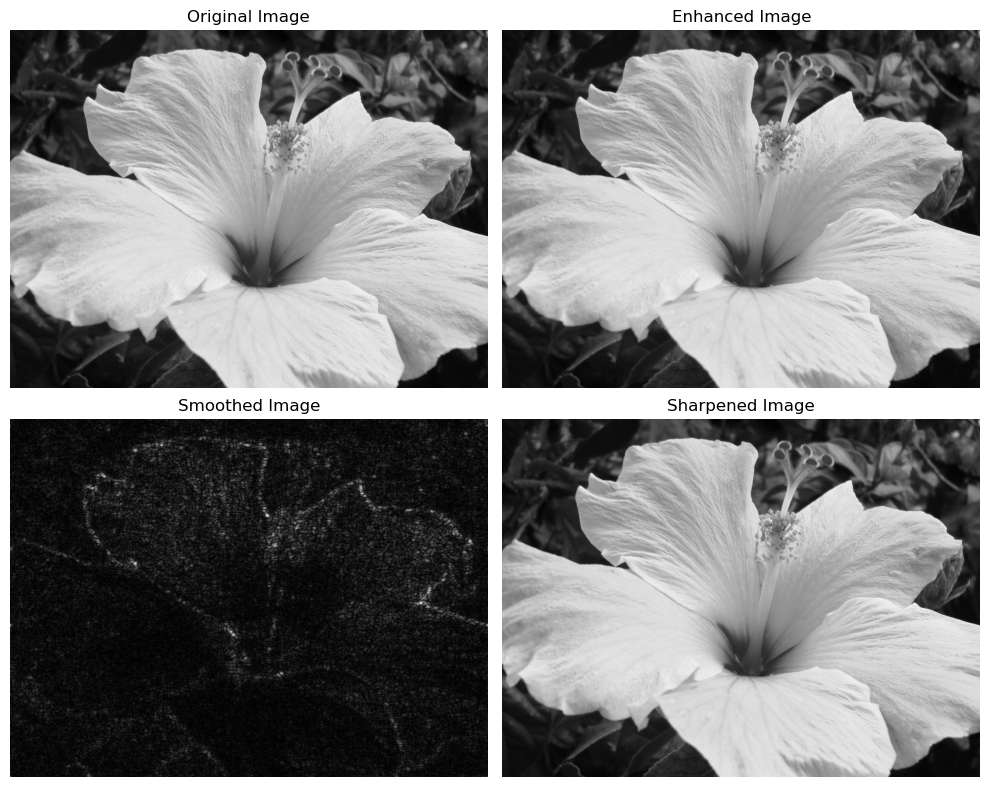

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

# Load the image
image_path = 'flower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform Fourier Transform
f_transform = fftshift(fft2(image))

# Define frequency domain filters
identity_filter = np.ones_like(f_transform)
low_pass_filter = np.zeros_like(f_transform)
low_pass_filter[200:400, 200:400] = 1
high_pass_filter = 1 - low_pass_filter

# Apply filters in frequency domain
enhanced_f_transform = f_transform * identity_filter
smoothed_f_transform = f_transform * low_pass_filter
sharpened_f_transform = f_transform * high_pass_filter

# Perform Inverse Fourier Transform
enhanced_image = np.abs(ifft2(ifftshift(enhanced_f_transform)))
smoothed_image = np.abs(ifft2(ifftshift(smoothed_f_transform)))
sharpened_image = np.abs(ifft2(ifftshift(sharpened_f_transform)))

# Plot original and processed images
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!pip install librosa

In [ ]:
#11 no Write a MATLAB/Python program to separation of voiced/un-voiced/silence regions from a speech signal.

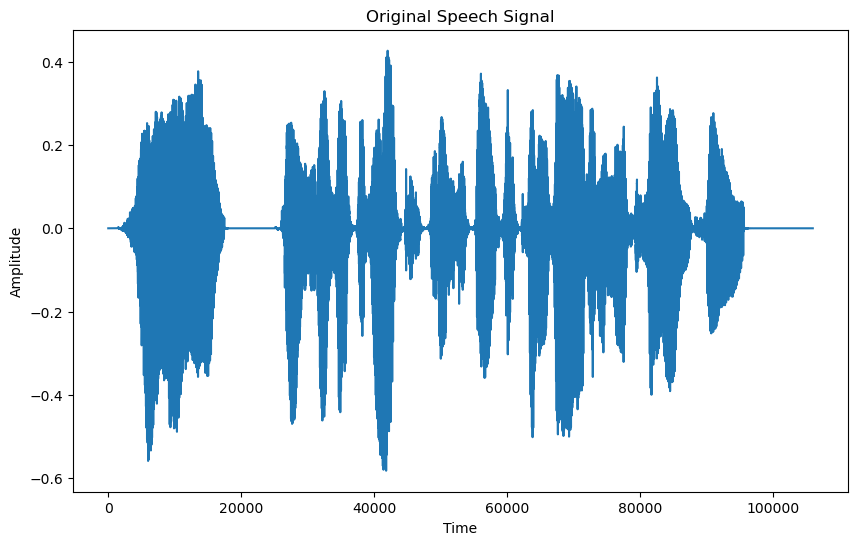

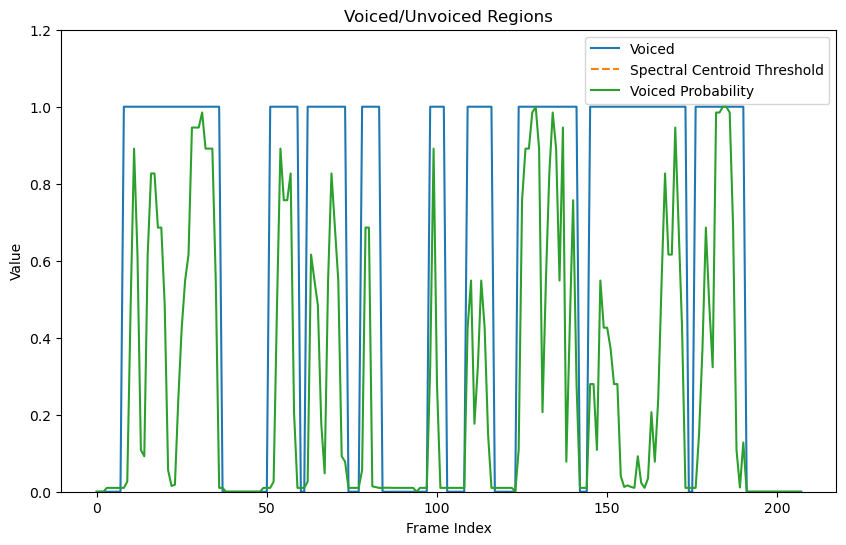

In [25]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
audio_path = 'output.mp3'
y, sr = librosa.load(audio_path, sr=None)

# Compute the short-time Fourier transform (STFT)
D = librosa.stft(y)

# Compute the power spectrogram
power = np.abs(D)**2

# Compute the spectral centroid (a measure of spectral center)
spectral_centroids = librosa.feature.spectral_centroid(S=power)

# Estimate pitch (fundamental frequency) using the Yin algorithm
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Set thresholds for spectral centroid and pitch to distinguish voiced and unvoiced regions
spectral_centroid_threshold = 2000  # Adjust as needed
pitch_threshold = 0.2  # Adjust as needed

# Initialize arrays to store regions
voiced_regions = []
unvoiced_regions = []
silence_regions = []

# Iterate through frames and classify regions
for i in range(len(voiced_flag)):
    if spectral_centroids[0][i] > spectral_centroid_threshold:
        if voiced_flag[i] and voiced_probs[i] > pitch_threshold:
            voiced_regions.append(i)
        else:
            unvoiced_regions.append(i)
    else:
        silence_regions.append(i)

# Plot the original waveform
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Plot regions
plt.figure(figsize=(10, 6))
plt.plot(voiced_flag, label='Voiced')
plt.plot([i for i in range(len(voiced_flag))], [spectral_centroid_threshold] * len(voiced_flag), label='Spectral Centroid Threshold', linestyle='--')
plt.plot(voiced_probs, label='Voiced Probability')
plt.legend()
plt.title('Voiced/Unvoiced Regions')
plt.xlabel('Frame Index')
plt.ylabel('Value')
plt.ylim(0, 1.2)
plt.show()



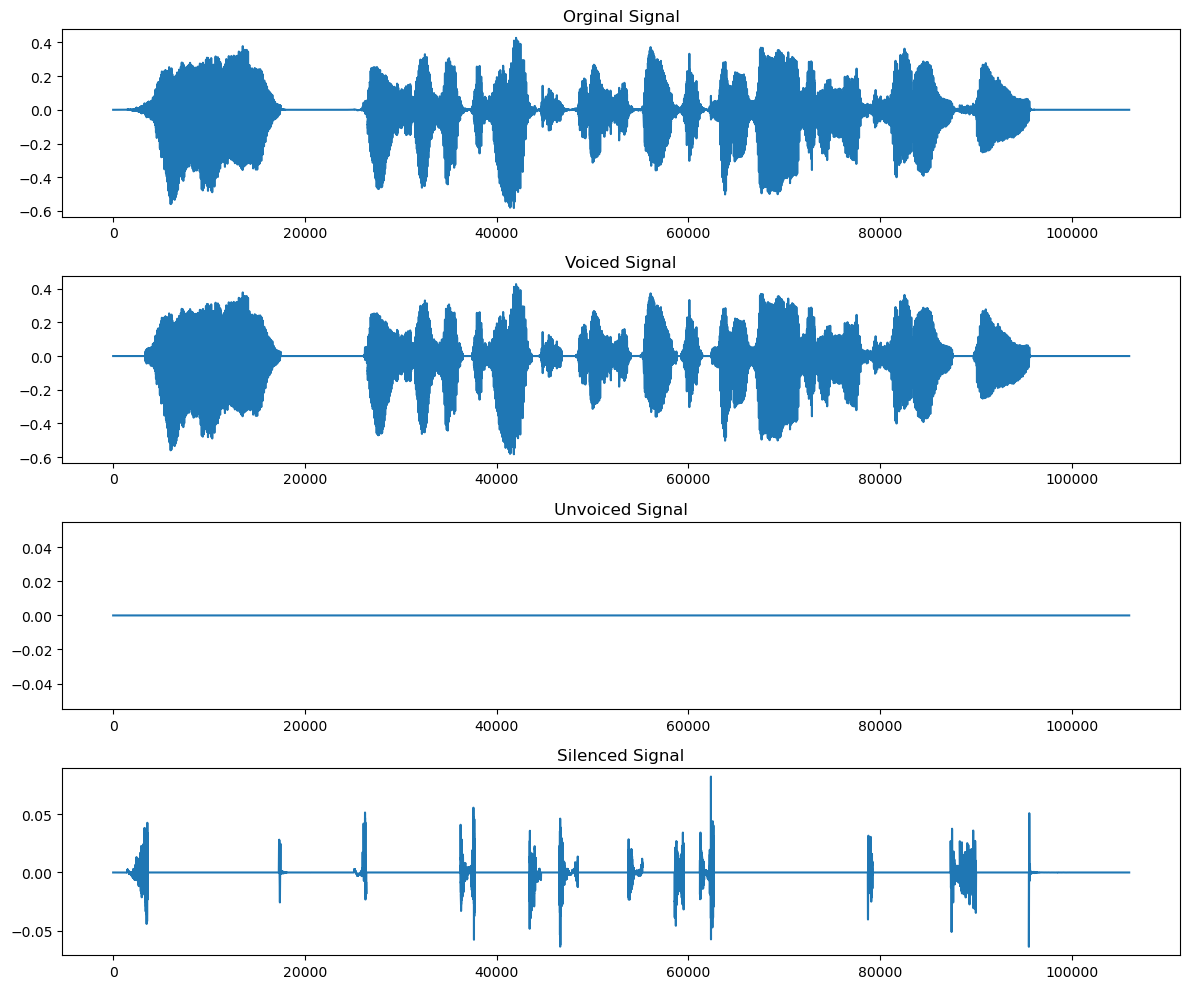

In [27]:

import numpy as np
import librosa
import sounddevice as sd
import matplotlib.pyplot as plt

# Load a speech signal (replace 'speech.wav' with your file)
speechSignal, Fs = librosa.load('output.mp3', sr=None)

# Parameters for voice activity detection
frame_size = int(0.02 * Fs)  # Frame size in samples (20 ms)
overlap = 0.5  # Overlap between frames (50%)
threshold_zcr = 20  # ZCR threshold to detect unvoiced segments
threshold_ste = 0.0003  # STE threshold to detect silence segments

# Initialize arrays to store results
voiced = np.zeros_like(speechSignal)
unvoiced = np.zeros_like(speechSignal)
silence = np.zeros_like(speechSignal)

for i in range(0, len(speechSignal) - frame_size, int(frame_size * (1 - overlap))):
    frame = speechSignal[i : i + frame_size]

    # Calculate zero-crossing rate
    zcr = np.sum(np.abs(np.diff(np.sign(frame)))) / (2 * frame_size)

    # Calculate short-time energy
    ste = np.sum(frame ** 2) / frame_size

    # Classify frames into voiced, unvoiced, or silence
    if zcr > threshold_zcr:
        unvoiced[i : i + frame_size] = frame
    elif ste < threshold_ste:
        silence[i : i + frame_size] = frame
    else:
        voiced[i : i + frame_size] = frame

# Play the original speech signal
# sd.play(speechSignal, Fs)
# sd.wait()
# print('Orginal')

# # Play the separated segments
# sd.play(voiced, Fs)
# sd.wait()
# print('Voice finished')
# sd.play(unvoiced, Fs)
# sd.wait()
# print('unvoiced finished')
# sd.play(silence, Fs)
# sd.wait()
# print('Silence finished')


plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(speechSignal)
plt.title('Orginal Signal')

plt.subplot(412)
plt.plot(voiced)
plt.title('Voiced Signal')

plt.subplot(413)
plt.plot(unvoiced)
plt.title('Unvoiced Signal')

plt.subplot(414)
plt.plot(silence)
plt.title('Silenced Signal')
plt.tight_layout()
plt.show()

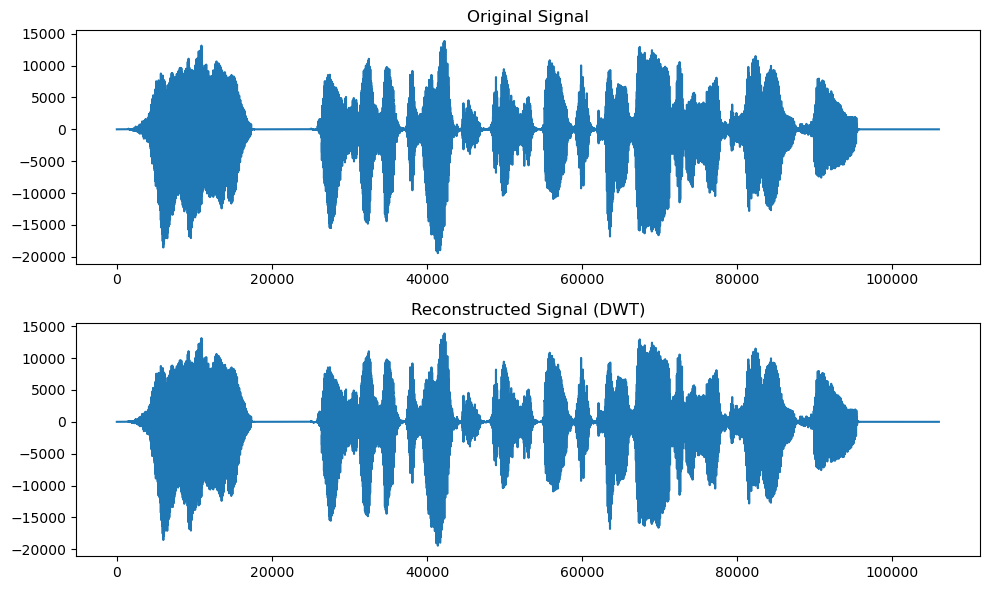

In [33]:
## 12 Write a MATLAB/Python program and plot multilevel speech resolution.
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import wavfile

# Load the audio file
audio_path = 'output1.wav'
sample_rate, signal = wavfile.read(audio_path)

# Choose a wavelet and decomposition level
wavelet = 'db4'  # Daubechies 4
level = 5

# Perform Discrete Wavelet Transform (DWT)
coeffs = pywt.wavedec(signal, wavelet, level=level)

# Reconstruct the approximation and details for visualization
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Plot the original signal and reconstructed signal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal)
plt.title('Reconstructed Signal (DWT)')
plt.tight_layout()
plt.show()


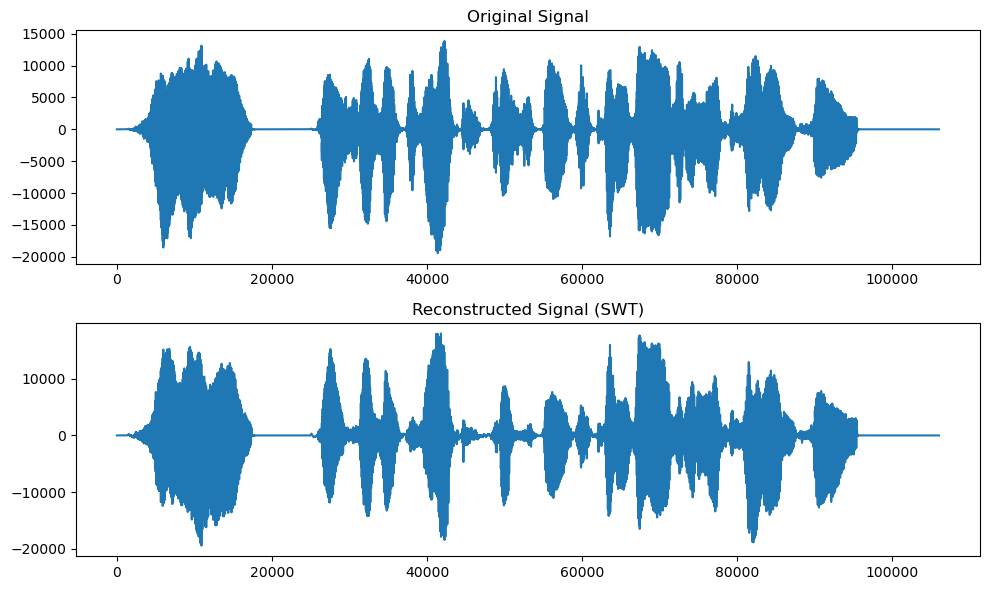

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import wavfile

# Load the audio file
audio_path = 'output1.wav'
sample_rate, signal = wavfile.read(audio_path)

# Choose a wavelet and decomposition level
wavelet = 'db4'  # Daubechies 4
level = 5

# Perform Stationary Wavelet Transform (SWT)
coeffs = pywt.swt(signal, wavelet, level=level)

# Reconstruct the approximation and details for visualization
reconstructed_signal = np.zeros(signal.shape, dtype=np.float64)
for i in range(len(coeffs)):
    for j in range(len(coeffs[i])):
        reconstructed_signal += coeffs[i][j]

# Normalize the reconstructed signal to match the amplitude of the original signal
reconstructed_signal *= np.max(np.abs(signal)) / np.max(np.abs(reconstructed_signal))

# Plot the original signal and reconstructed signal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal)
plt.title('Reconstructed Signal (SWT)')
plt.tight_layout()
plt.show()


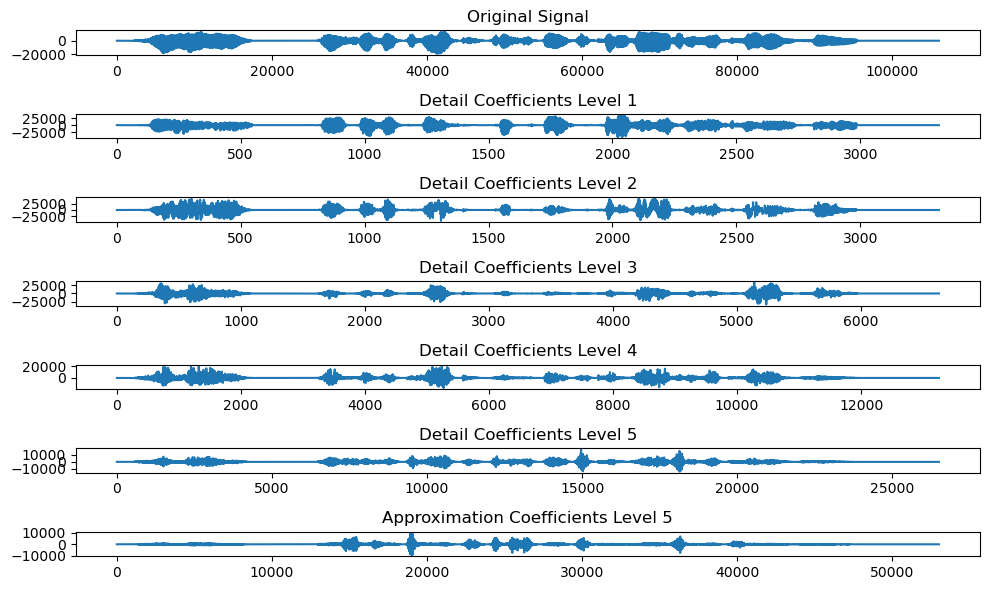

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import wavfile

# Load the audio file
audio_path = 'output1.wav'
sample_rate, signal = wavfile.read(audio_path)

# Choose a wavelet and decomposition level
wavelet = 'db4'  # Daubechies 4
level = 5

# Perform wavelet decomposition
coeffs = pywt.wavedec(signal, wavelet, level=level)

# Plot the original signal
plt.figure(figsize=(10, 6))
plt.subplot(level + 2, 1, 1)
plt.plot(signal)
plt.title('Original Signal')

# Plot the decomposition coefficients
for i in range(level):
    plt.subplot(level + 2, 1, i + 2)
    plt.plot(coeffs[i])
    plt.title(f'Detail Coefficients Level {i+1}')

# Plot the approximation coefficients
plt.subplot(level + 2, 1, level + 2)
plt.plot(coeffs[level])
plt.title(f'Approximation Coefficients Level {level}')

plt.tight_layout()
plt.show()


In [ ]:
!pip install SpeechRecognition

In [30]:
#13  Write a MATLAB/Python program to recognize speech signal.
import speech_recognition as sr

# Initialize the recognizer
recognizer = sr.Recognizer()

# Load an audio file
file_path = 'output1.wav'

# Read the audio file using the recognizer
with sr.AudioFile(file_path) as source:
    audio = recognizer.record(source)

# Recognize speech using Google Web Speech API
try:
    recognized_text = recognizer.recognize_google(audio)
    print("Recognized text: ", recognized_text)
except sr.UnknownValueError:
    print("Speech recognition could not understand audio")
except sr.RequestError as e:
    print(f"Could not request results from Google Web Speech API; {e}")

Recognized text:  hello this is a text to speech conversion example


In [ ]:
!pip install sounddevice

In [ ]:
!pip install gtts sounddevice

In [74]:
!pip install sounddevice

In [31]:
#14 no
from gtts import gTTS
import sounddevice as sd
import soundfile as sf
import os

# Text to be converted to speech
text = "Hello, this is a text-to-speech conversion example."

# Perform text-to-speech conversion
textToSpeech = gTTS(text)
textToSpeech.save("output.wav")

# Load the generated speech
audio_data, sample_rate = sf.read("output.wav", dtype='float32')

# Play the generated speech
sd.play(audio_data, sample_rate)
sd.wait()  # Wait until the playback is finished

# Clean up by removing the generated file
os.remove("output.wav")
